In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

from smoker_status.config import RAW_DATA_DIR
from smoker_status.features import create_encoded_X

In [4]:
df = pd.read_csv(RAW_DATA_DIR / 'train.csv')

df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
X: pd.DataFrame = df.drop(['smoking', 'id'], axis=1)
y: pd.Series = df['smoking']

Looking at dataset, looks like the following features are classes:
`hearing(left)`, `hearing(right)`, `Urine protein`, `dental caries`

In [6]:
X_trans = create_encoded_X(X)
X_trans.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,hearing(right) - normal,hearing(right) - abnormal,Urine protein - negative,Urine protein - trace,Urine protein - 1+,Urine protein - 2+,Urine protein - 3+,Urine protein - 4+,dental caries - nonpresent,dental caries - present
0,55,165,60,81.0,0.5,0.6,135,87,94,172,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,70,165,65,89.0,0.6,0.7,146,83,147,194,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,170,75,81.0,0.4,0.5,118,75,79,178,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35,180,95,105.0,1.5,1.2,131,88,91,180,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,165,60,80.5,1.5,1.0,121,76,91,155,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

In [ ]:
scores = cross_val_score(clf, X_trans, y, cv=10, scoring='accuracy', n_jobs=-1)
scores.mean()

np.float64(0.774426130192801)

Split into training and testing so we can play with accuracy_score() and predict()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_trans, y, test_size=0.3, random_state=1
)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(111479, 30)
(111479,)
(47777, 30)
(47777,)


In [17]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.7766289218661699


In [18]:
y_predict_prob = clf.predict_proba(X_test)
# Estimated likelihood of smoking=1 for testing set
print(y_predict_prob[:, 1])

[0.13 0.89 0.61 ... 0.93 0.43 0.  ]


In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:, 1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print(metrics.roc_auc_score(y_test, y_predict_prob[:, 1]))

0.8589331729092156


ROC Curve

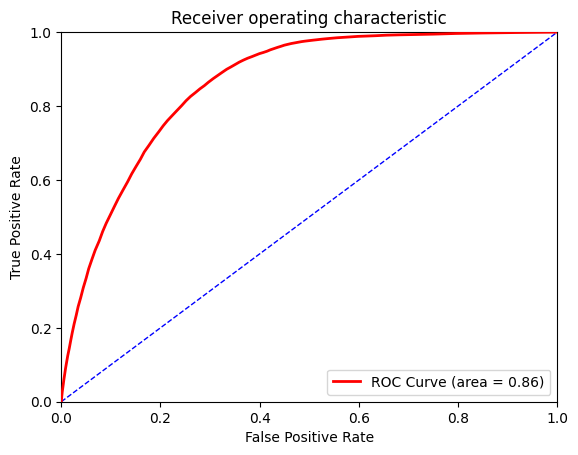

In [23]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (area = {AUC:0.2f})', zorder=3)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([0, 1])
plt.ylim([0, 1])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')

plt.show()